# **GRU Exercise**

## Import libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [41]:
df=pd.read_csv('/content/traffic.csv')

In [17]:
print(df.columns)

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')


In [18]:
# Assuming 'Date' is the column with dates, convert it to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Filter data based on date range
start_date = '2015-01-01'
end_date = '2017-01-01'
df_filtered = df[(df['DateTime'] >= start_date) & (df['DateTime'] <= end_date)]

# Display the first few rows of the filtered DataFrame

df_filtered.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [19]:
df_filtered.tail()

,DateTime,Junction,Vehicles,ID
39429,2016-12-31 21:00:00,3,14,20161231213
39430,2016-12-31 22:00:00,3,13,20161231223
39431,2016-12-31 23:00:00,3,10,20161231233
39432,2017-01-01 00:00:00,3,10,20170101003
43776,2017-01-01 00:00:00,4,3,20170101004


## Data Exploration



In [20]:
df_filtered.isnull().sum()

,0
DateTime,0
Junction,0
Vehicles,0
ID,0


In [21]:
df_filtered.describe()

,DateTime,Junction,Vehicles,ID
count,30748,30748.000000,30748.000000,3.074800e+04
mean,2016-06-01 12:09:59.921946112,2.000065,19.974860,2.015931e+10
min,2015-11-01 00:00:00,1.000000,1.000000,2.015110e+10
25%,2016-02-15 18:00:00,1.000000,9.000000,2.016022e+10
50%,2016-06-01 12:00:00,2.000000,14.000000,2.016060e+10
75%,2016-09-16 06:15:00,3.000000,26.000000,2.016092e+10
max,2017-01-01 00:00:00,4.000000,134.000000,2.017010e+10
std,NaN,0.816576,16.526529,3.341994e+06


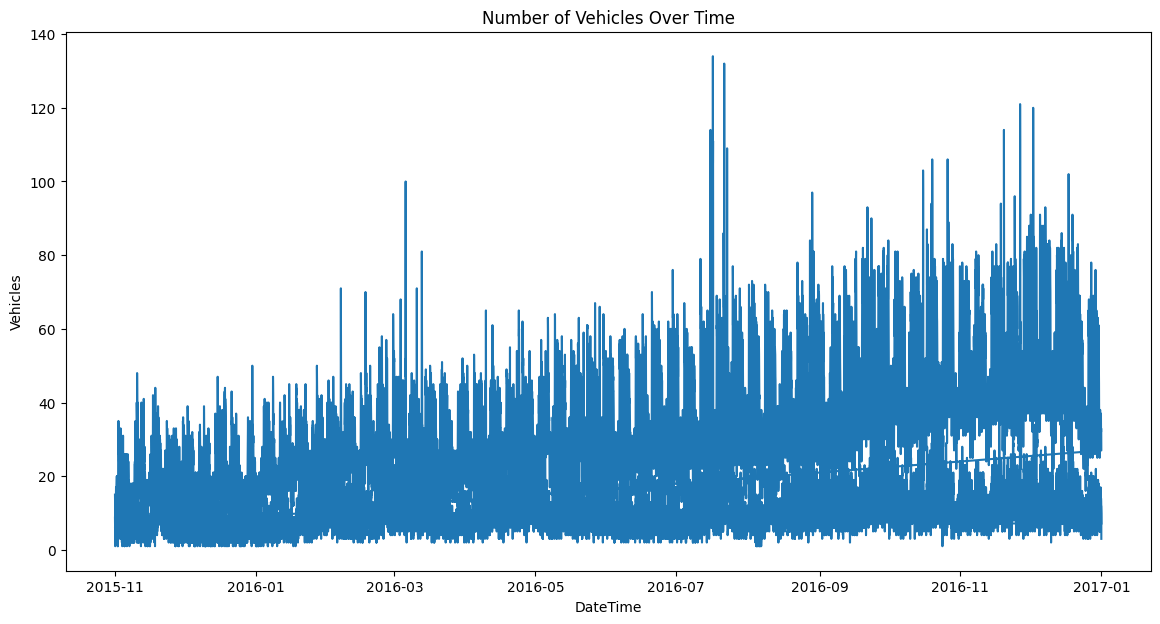

In [22]:
# Draw graphs to explore the data.
# Plot the number of vehicles over time.
plt.figure(figsize=(14,7))
plt.plot(df_filtered['DateTime'], df_filtered['Vehicles'])
plt.title('Number of Vehicles Over Time')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.show()

## Feature Engineering (if needed)



In [26]:
# Extract month or day from date:
df_filtered['Month'] = df_filtered['DateTime'].dt.month
df_filtered['Day'] = df_filtered['DateTime'].dt.day

## Exploratory Data Analysis


In [31]:
X = df_filtered[['Vehicles']].values

In [33]:
scaled = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)


In [34]:
# Definition of sequence length
seq_length = 60

# Create input and output sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [35]:
X, y = create_sequences(X_scaled, seq_length)

# Reshape X to fit the 3D input of the GRU model.
X = X.reshape((X.shape[0], X.shape[1], 1))

## split into train and test sets

In [36]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [37]:
# Splitting data into inputs (X) and outputs (y)
X = df_filtered[['Vehicles', 'Month', 'Day']]  # I used the features I created.
y = df_filtered['Vehicles']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Building



In [38]:
#Model Building GRU
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(units=50))
model.add(Dense(1))

In [39]:
# compile model
model.compile(optimizer='adam', loss='mean_squared_error')



In [40]:
#Training Model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
769/769 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 328.3276 - val_loss: 69.5893
Epoch 2/20
769/769 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 58.6812 - val_loss: 19.4380
Epoch 3/20
769/769 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 19.7032 - val_loss: 6.8164
Epoch 4/20
769/769 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 7.4884 - val_loss: 2.8292
Epoch 5/20
769/769 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 3.3590 - val_loss: 1.4461
Epoch 6/20
769/769 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 1.5868 - val_loss: 0.7737
Epoch 7/20
769/769 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 1.2861 - val_loss: 0.4971
Epoch 8/20
769/769 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 1.2350 - val_loss: 0.3812
Epoch 9/20
769/769 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.7987 - val_loss: 0.2602
Epoch 10/20
769/769 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.6233 - val_loss: 0.1882
Epoch 11/20
769/769 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.6671 - val_loss: 0.1189
Epoch 12/20
769/769 ━━━━━━━━━━━━━━━━━━━━ 

## Make preductuion and evaluatuin matrix.

In [43]:
# Convert y_test from Series to NumPy array and then reshape it
y_test = y_test.values.reshape(-1, 1)
# Making predictions using the model
y_pred = model.predict(X_test)

# Reconvert predictions and actual values ​​to the original range.
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

#Evaluation matrix calculation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Squared Error: 115.28408895091582
R-squared: 0.9999753703739654


## Visualize the result

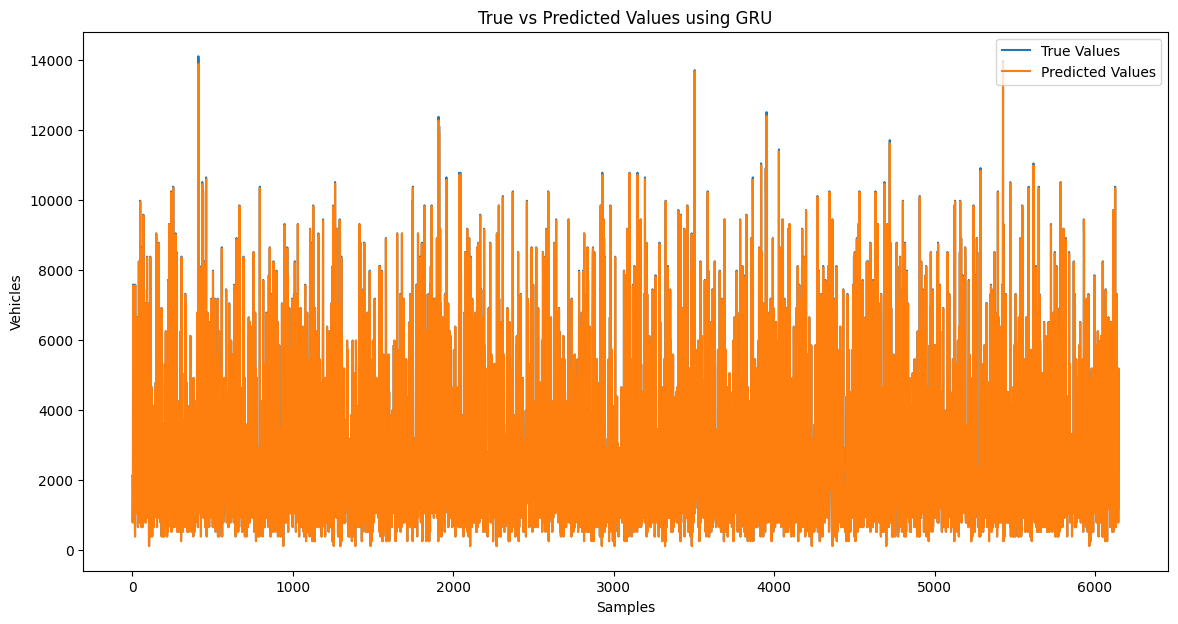

In [45]:
plt.figure(figsize=(14,7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('True vs Predicted Values using GRU')
plt.xlabel('Samples')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

# **Well done** :)